# 准备工作

## 安装vue，vue-cli:
- vue-cli目前新版本升级安装差异比较大：
    - 老版本安装：`npm install vue vue-cli`
    - 新版本安装：`npm install vue @vue/cli   @vue/cli-init`

- 安装脚本，在Mac OS X系统全局安装
    - `sudo npm install vue  @vue/cli  @vue/cli-init -g  --unsafe-perm`
    - 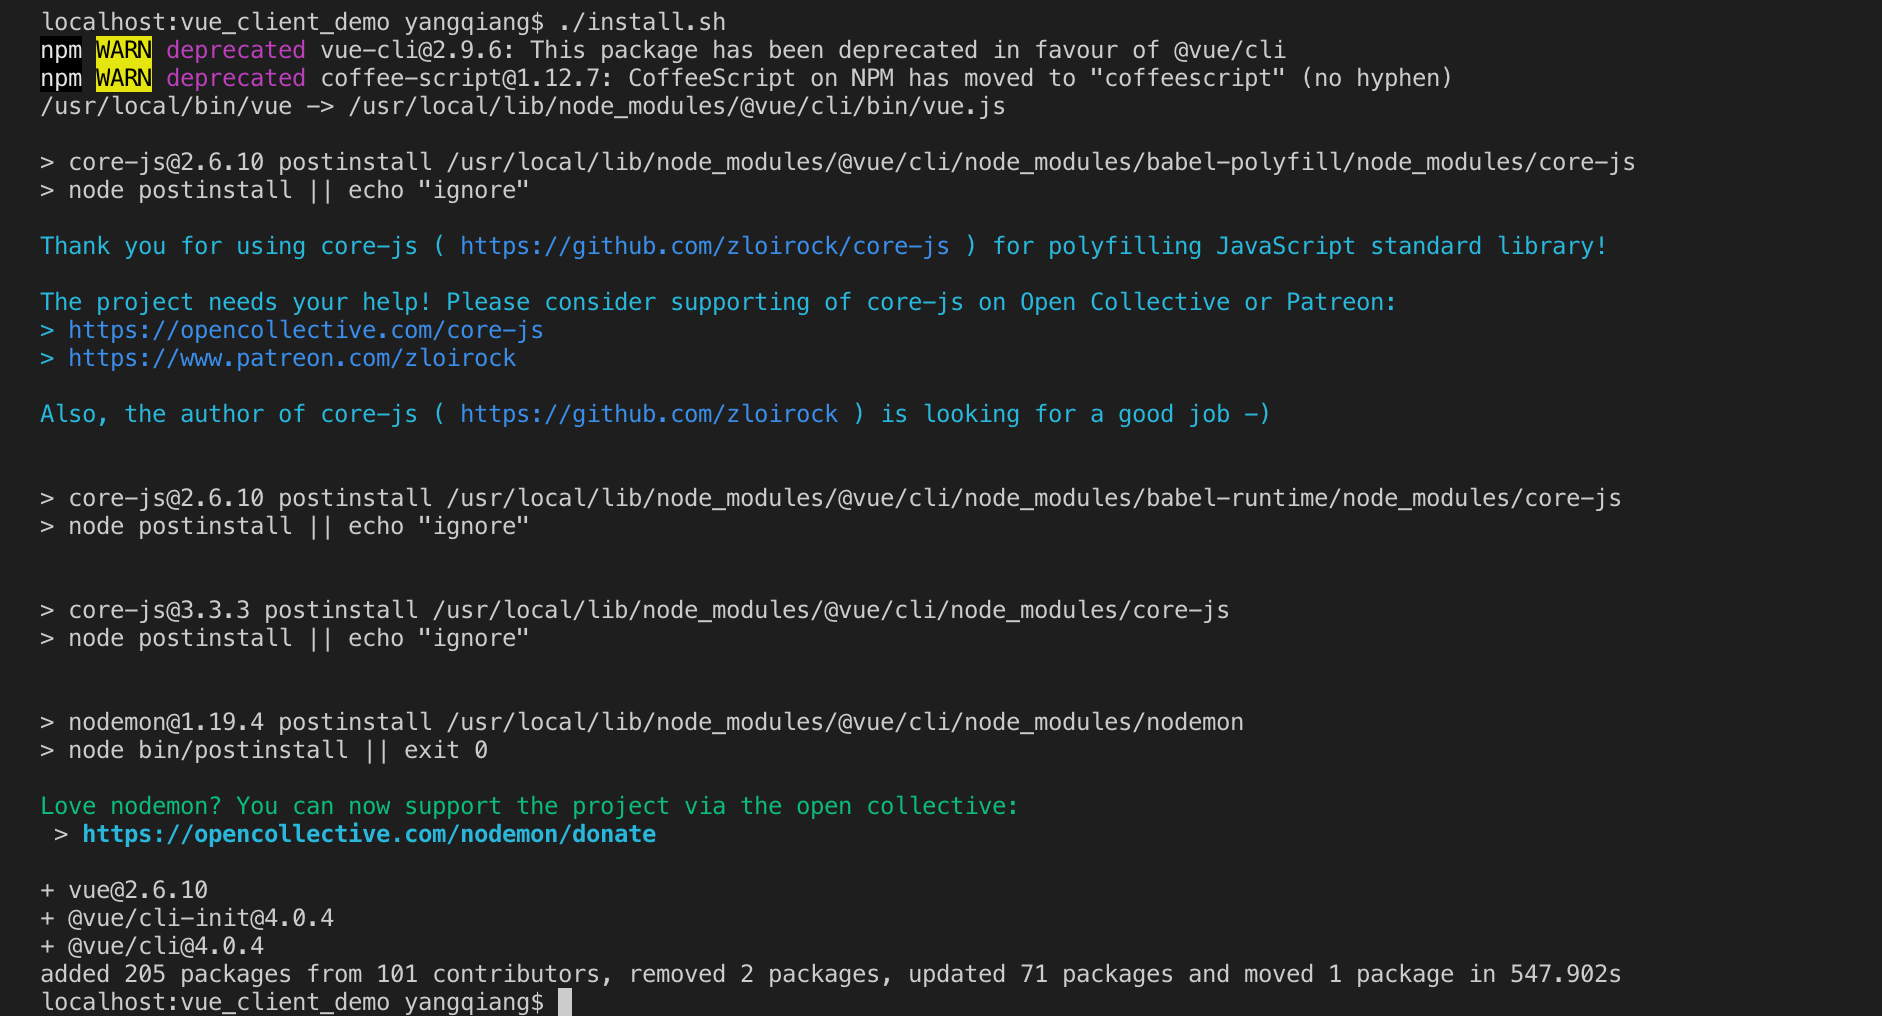

## 工具使用与帮助

- `vue --help`

- 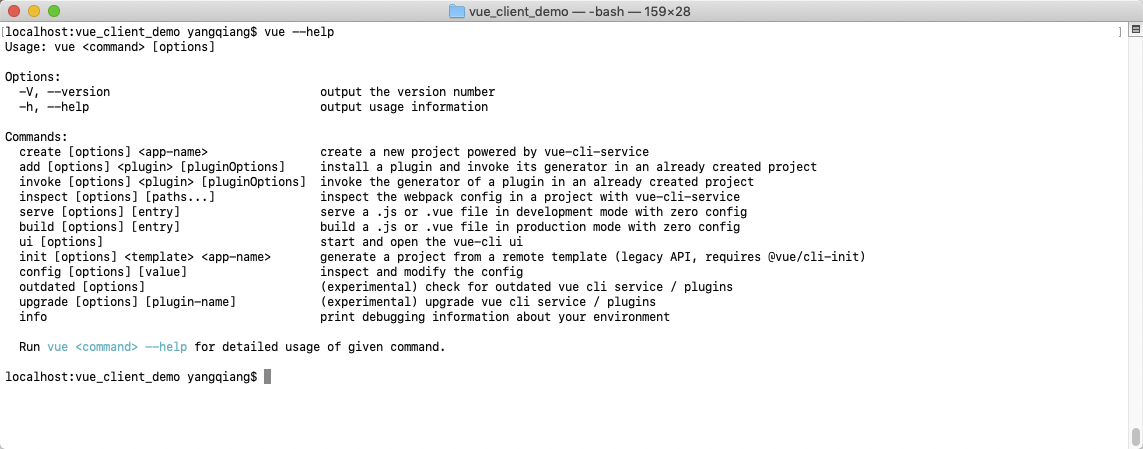

# 创建项目

- 创建可以使用两种方式:
    - `vue  init  模板  项目名`
        - 模板按照老版本帮助使用；
    - `vue create  项目名`

## 使用vue init创建项目

- 下面是使用`vue init`创建项目的截图：
    - 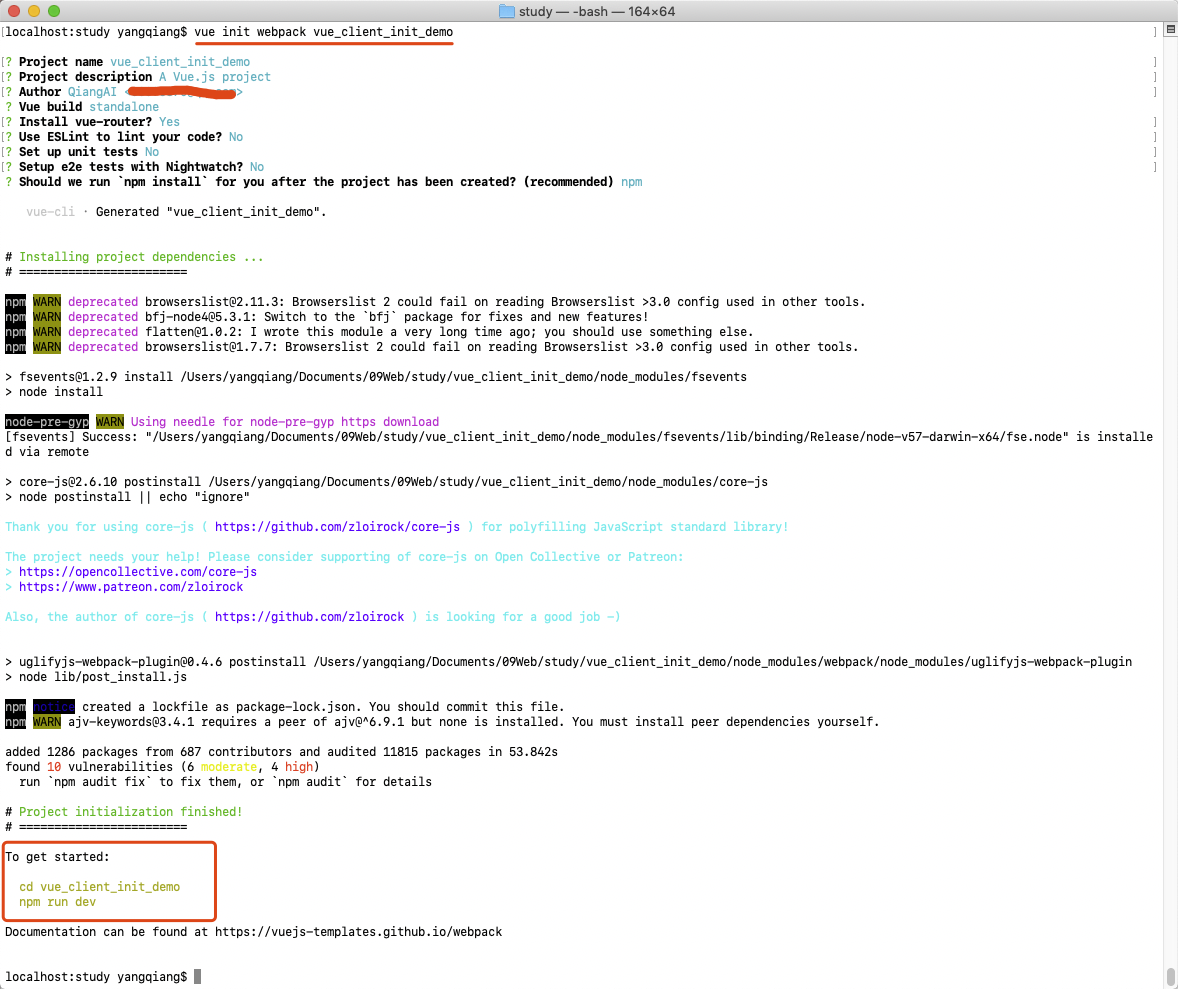

- 其中`ajv@^6.9.1`需要自己单独安装
    - 进入项目目录后执行如下指令：`npm install ajv@^6.9.1 --save-dev`
    - 安装中如果存在问题，可以使用`npm audit`打印审计报告，然后按照审计报告的提示安装相关依赖的模块。

- 创建以后的目录结构
    - 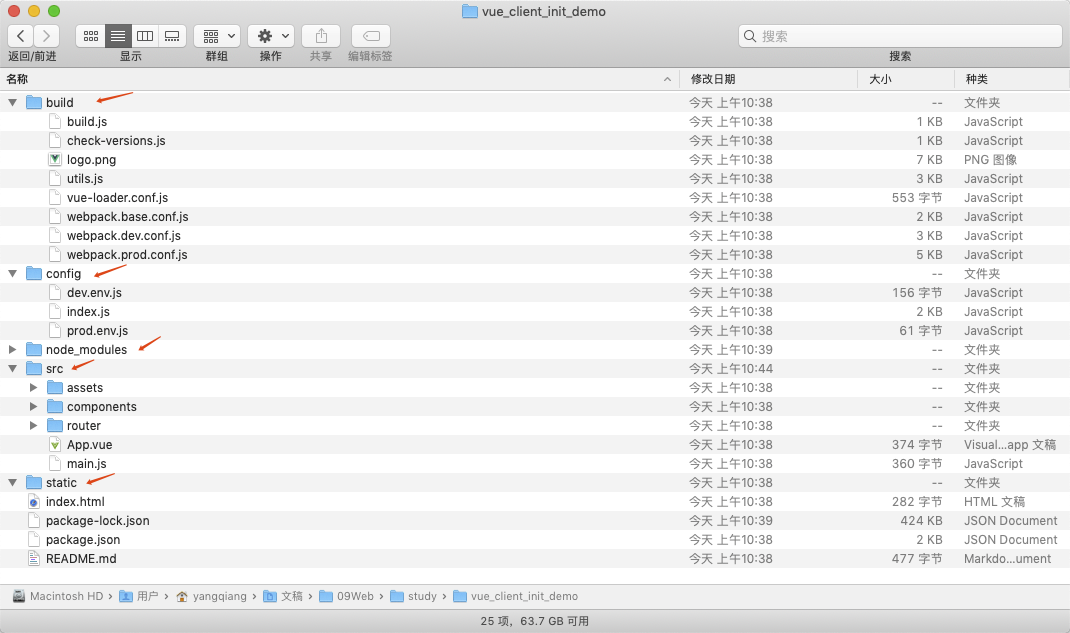

## 使用vue create创建项目

- 使用指令：`vue create vue_client_create_demo`

- 创建过程截图：
    - 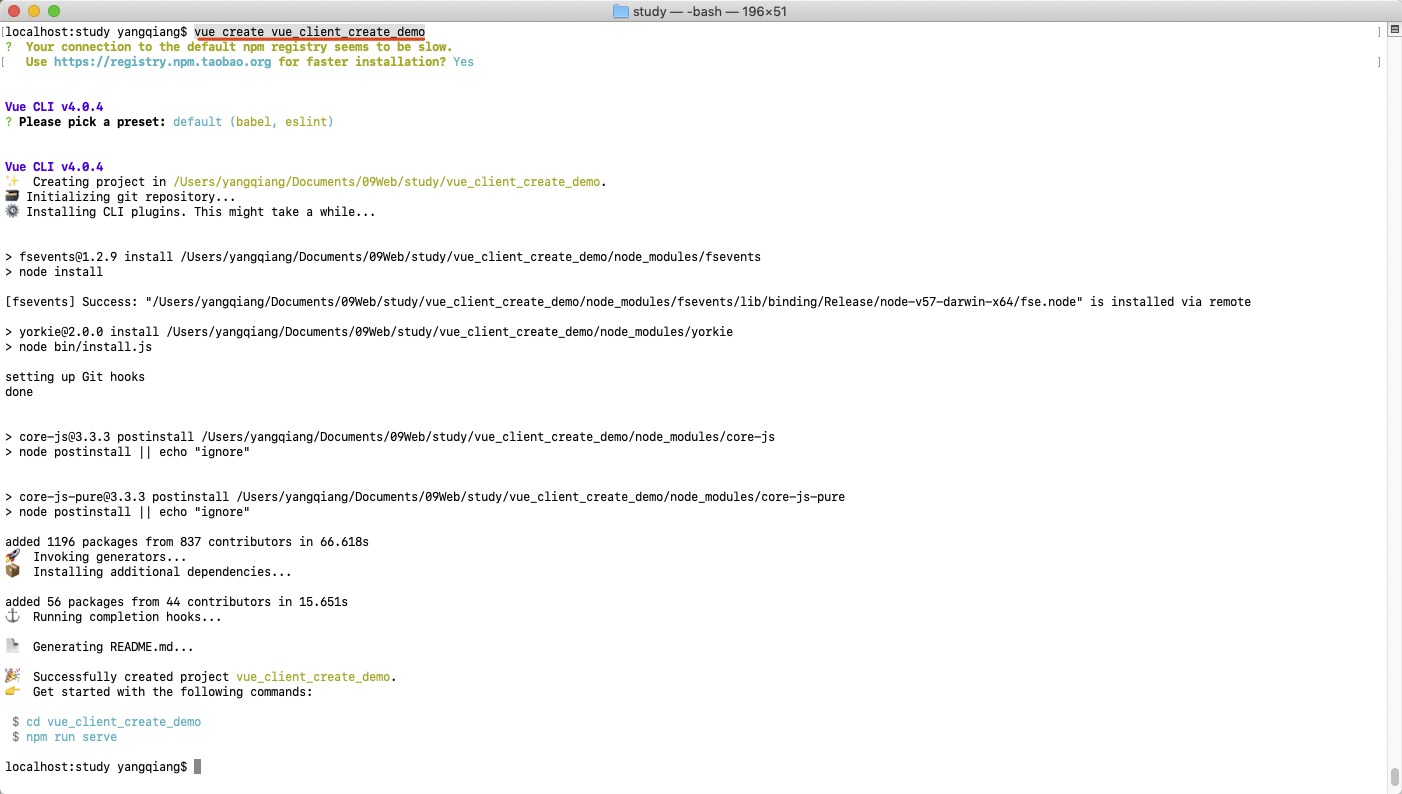

- 创建后的项目目录结构
    - 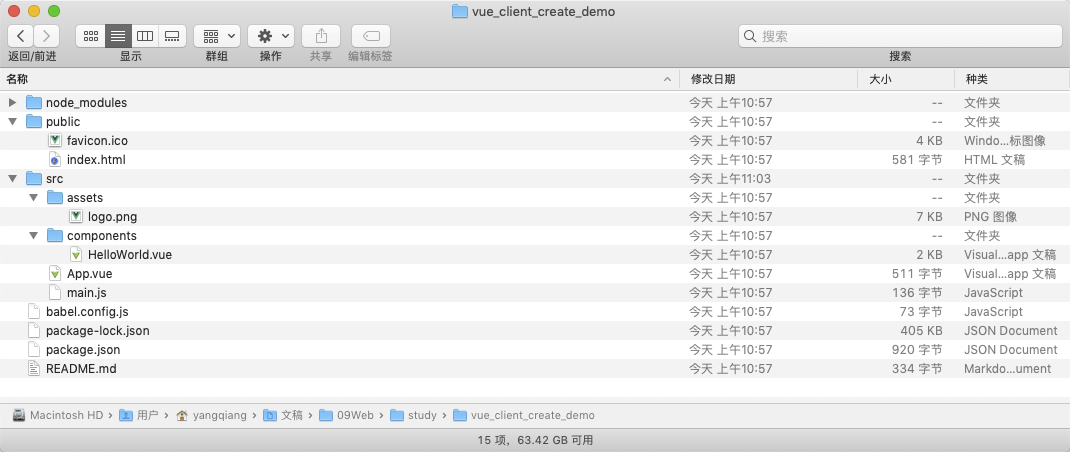

- 提示：
    - 使用create明显在相关依赖包的问题上更加良好，目录结构更加简洁，配置文件更加简洁。
        - Vue create这么简洁的配置方式是使用了大量的默认配置，这个需要开发者遵循这些默认规则（这是个黑盒）。
        - 简洁的配置可以让程序员更多的关注逻辑实现与页面设计；
    - 在我的环境中，使用init创建的还有各种模块没有安装的错误，使用create都缺省处理这些模块的安装，并可以直接运行。推荐使用`vue create`创建项目。

- 这样可以使用VSCode进行开发了：
    - 直接使用VSCode打开创建的工程目录即可。

# 使用项目

## 构建

- 构建的结果可以在浏览器中运行的静态页面；
    - 注意：其中的路径在用的是服务器运行的根绝对路径`\`。

- 构建指令：`npm run build`

- 构建成功，创建dist目录存放构建好的静态Web代码文件

## 运行项目

- 运行指令：`npm run serve`
- 然后根据提示，直接在浏览器输入访问url即可。

# Vue下的Web前端开发模式

## 页面HTML结构文件

- 通常用来作为入口文件的js容器。
- 添加一个HTML标记作为组件挂载点。

```HTML
<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
    <title></title>
  </head>
  <body>
    <div id="app"></div>
  </body>
</html>

```

- 提示：
    - 其中的`<div id=app>`就是模块组件的挂载点；
    - 入口js会被框架自动插入；

## vue路由容器

- 该容器用来切换不同的工作区页面；
    - 该文件为了支持Vue提供标准的三个部分：
        1. 模板部分；
        2. JS部分；
        3. CSS部分；

```HTML

<template>
  <div id="app">
    <h1>首页</h1>
    <router-view></router-view>
  </div>
</template>
<script>
// import Vue from 'vue'
// import Router from 'vue-router'
export default {
  name: 'app',
  components: {
  }
}
</script>
<style>
</style>



```

## 在入口js中添加路由设置

```javascript
    import Vue from 'vue';
    import Router from "vue-router";
    import App from './App.vue';

    Vue.use(Router);
    Vue.config.productionTip = false

    var router = new Router({
      mode:"hash",
      base: __dirname, 
      // routes: {}   // 今后绑定全局路由
    });

    new Vue({
      router,
      render: h => h(App),
    }).$mount('#app')

```

## 测试

- 上面的几个文件，基本上构成了Web开发的基本要素与步骤；
- 直接使用`npm run serve`可以启动服务器运行，然后使用浏览器访问即可；
    - 服务器启动：
    - 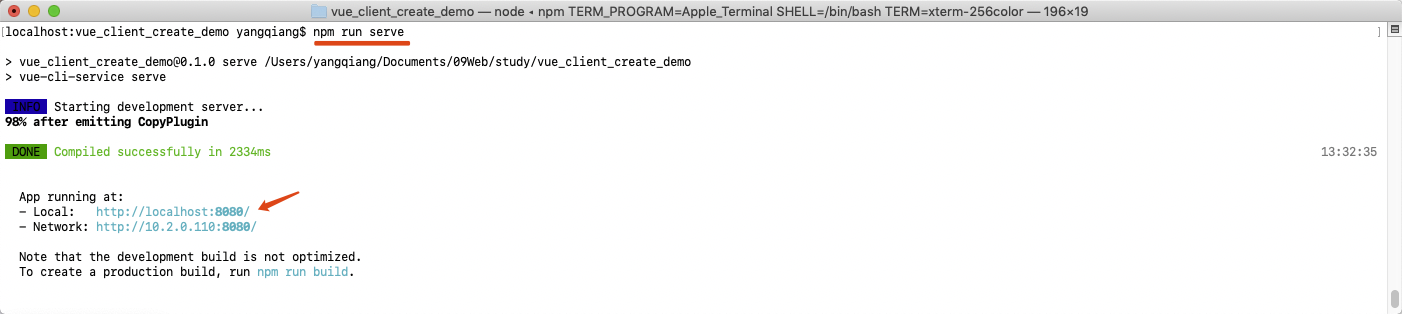

- 浏览器访问：
    - 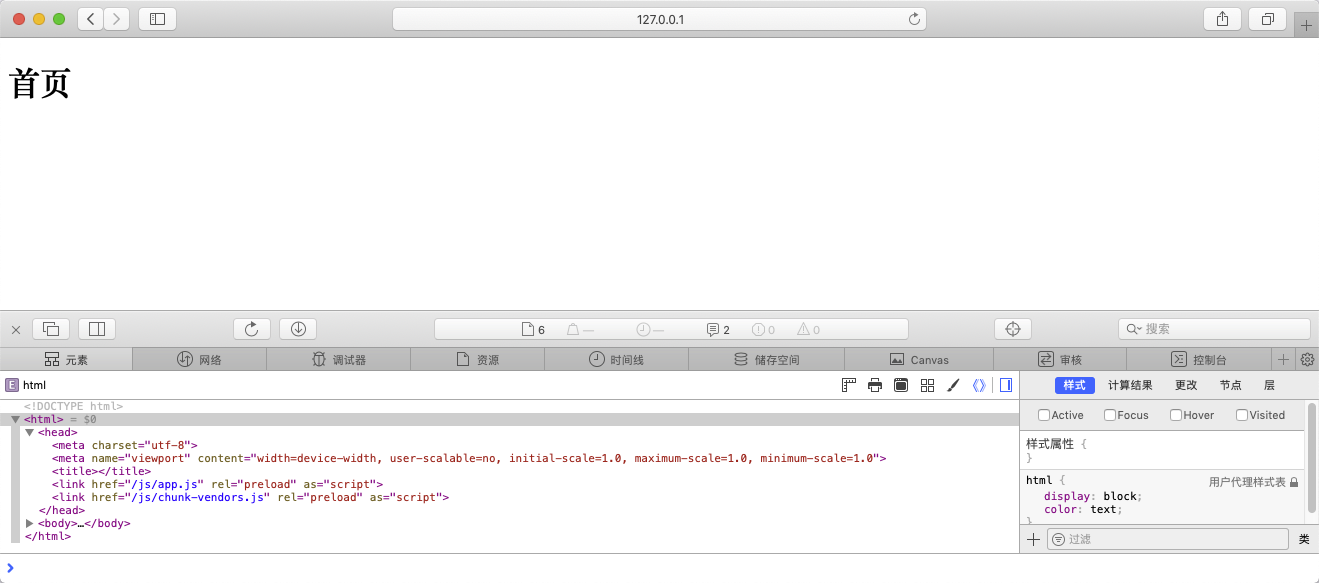

# 设计首页

- 开发模式：
    1. 单独使用Vue设计首页工作区域；
    2. 加载Vue为组件；
    3. 把组件关联到路由管理器；

## 设计首页核心组件

```HTML

    <template>
      <div>
        <h1 id="tl">首页</h1>
      </div>
    </template>
    <script>
      // jQuery在main.js中定义的默认不是全局变量，全局变量需要使用插件设置ProvidePlugin
      // ProvidePlugin插件的配置需要在Vue的配置文件中，为了简洁vue默认是没有提供配置文件，
      // 可以自己在package.json同级目录创建一个 vue.config.js 文件配置
      $(
        function(){
          $('#tl').css('border','3px solid red');
          $('#tl').click(
            function(){
              alert('Hello');
            }
          );
        }
      );
    </script>
    <style scoped>

    </style>


```

## 加载Vue为组件

```javascript
    import Vue from 'vue';
    import App from './App.vue';
    import Router from 'vue-router';
    import index from './components/index.vue';

    Vue.config.productionTip = false
    Vue.use(Router);

```

## 把组件关联到路由管理器

- 就是理由映射器

```javascript
    import Vue from 'vue';
    import App from './App.vue';
    import Router from 'vue-router';
    import index from './components/index.vue';

    Vue.config.productionTip = false
    Vue.use(Router);

    // 路由
    var routes = [
      {
        path: '/',
        component: index
      }
    ];

    var router = new Router({
      mode:"hash",
      base: __dirname, 
      routes: routes   // 今后绑定全局路由
    });

    var vm = new Vue({
      router,
      render: h => h(App),
    });
    vm.$mount('#app');

```

# 关于vue与jquery

- 强烈建议在vue框架中不使用jquery，在vue2与vue3已经有一些变化，下面是在vue3中使用jquery的配置

## 使用npm安装jquery

- 不再使用jquery.js文件
    - 安装指令：`npm install jquery --save`

- 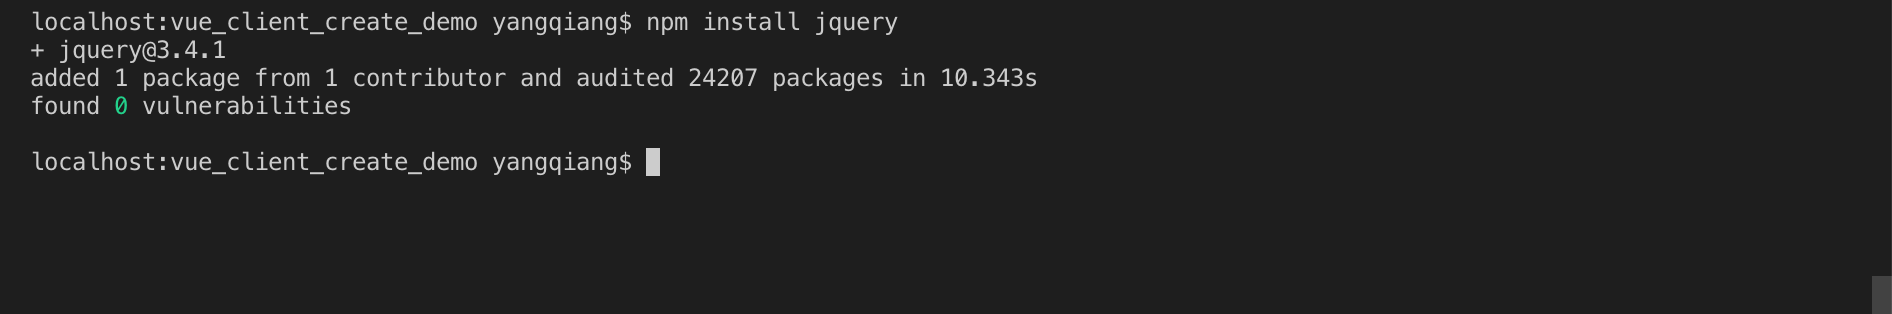

## 在配置文件中配置env选项

- 在package.json文件中
    - 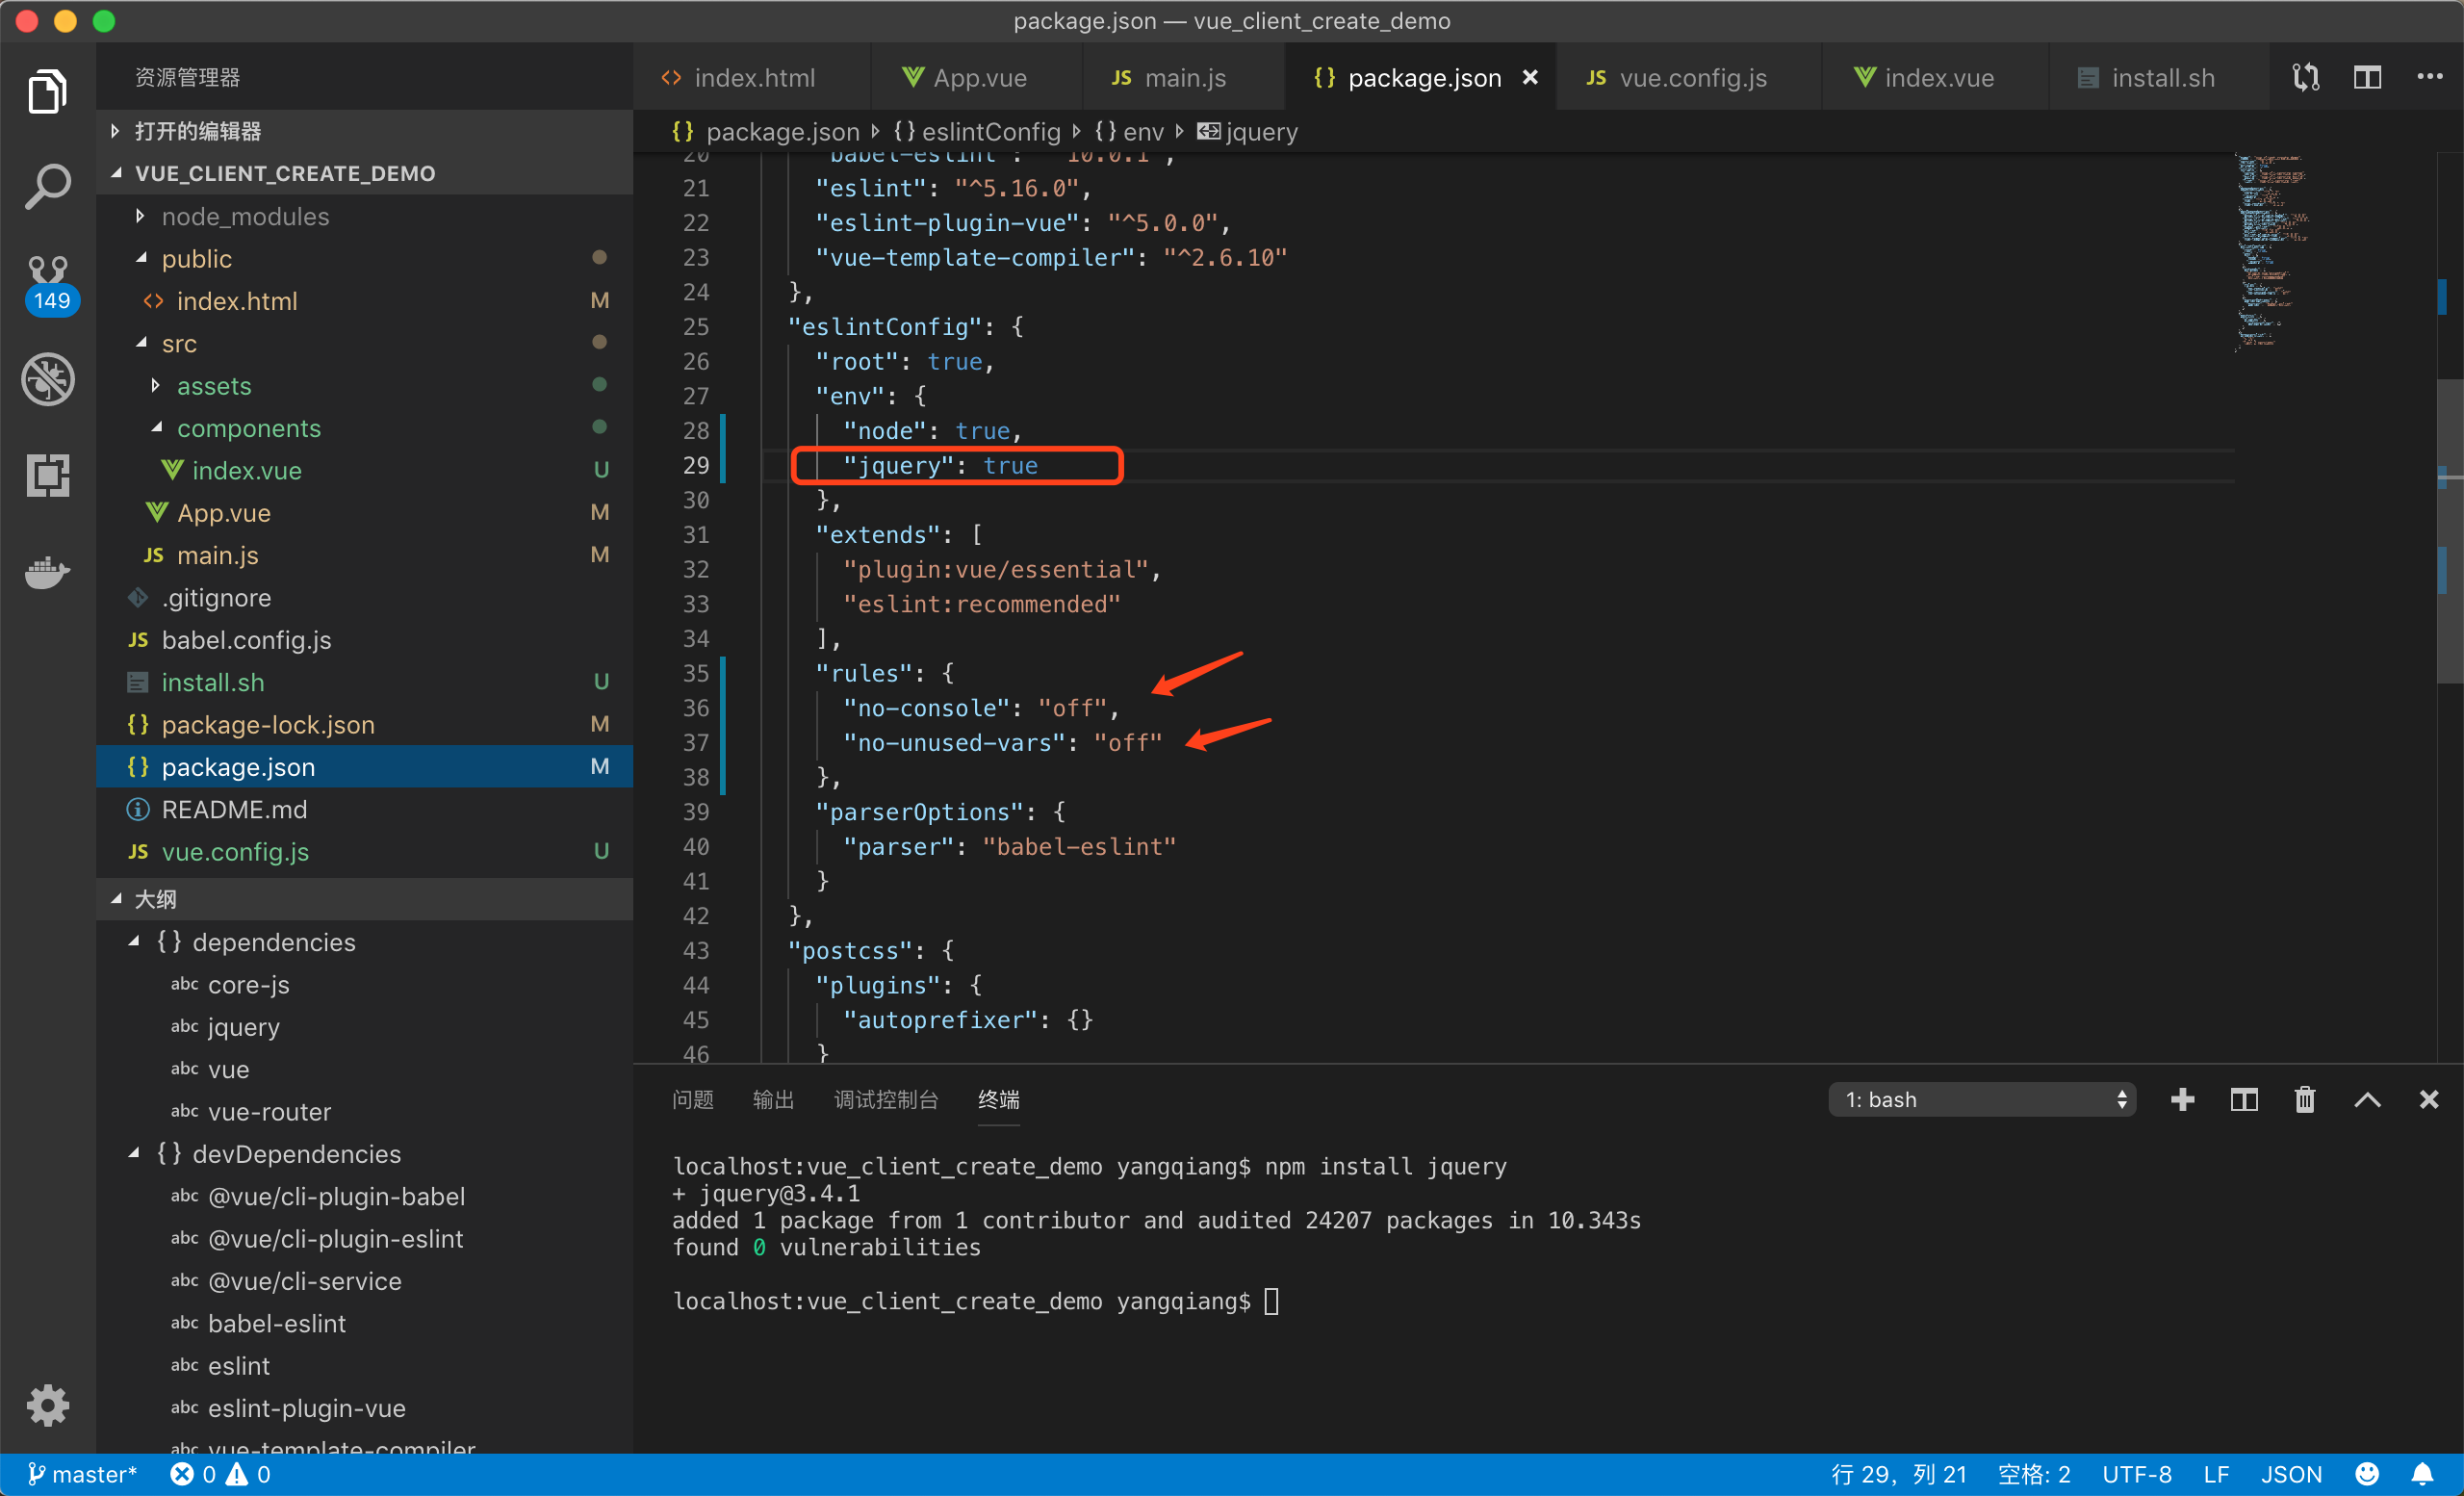

## 安装插件，导出全局访问变量

- 这一个过程需要使用vue的配置文件，vue的原则是简洁，大部分采用默认配置，如果想定制配置，可以在package.json同级目录下创建一个vue.config.js文件，在其中进行配置。

```javascript


const webpack = require("webpack");
 
module.exports = {
    /*
        创建 '$'指向 jquery依赖的全局变量
    */
  
configureWebpack: {
    plugins: [
      new webpack.ProvidePlugin({
        $: 'jquery',
       }),
    ]
   }
}
```

----

# 附录

- 在Vue3使用js脚本，可以在官网找到最新的解决方案。：

- cooking框架可以实现更加简易的vue开发，不过到目前为止已经停止支持，而且建议使用webpack与poi框架。
    - webpack前面我们一直在使用。
- poi框架与webpack都是一种翻译框架。
    - 提供更好的兼容特性；

----